In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


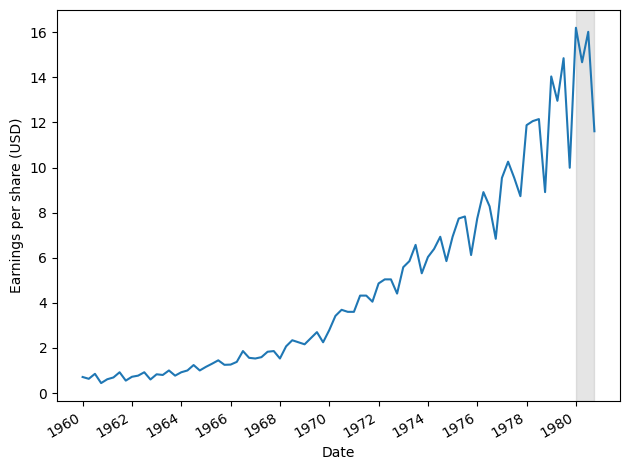

In [4]:
#  PLOT DATA
# ======================
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

In [5]:
# SPLIT TRAIN / TEST
# ==================
train = df[:-4]
test = df[-4:]

### 1. Navie Forecast - Historical Mean

In [6]:
# IMPLEMENTING HISTORICAL MEAN
# ============================
historical_mean = np.mean(train['data'])
print(historical_mean)

4.308499987499999


In [7]:
# FORECAST THIS VALUE FOR EACH QUARTER
# ====================================
test.loc[:, 'pred_mean'] = historical_mean

In [8]:
# DEFINE ERROR METRIC
# ====================
# -> 1. MAPE, independent of scale of data, easy to interpret
# -> 2. %age of how much forecasted value deviate from observed or actual on average
def mape(y_true, y_pred):
    """
    arguments:
        y_true : actual value
        y_pred : forecasted value
    
    returns:
        mape : mean absolute percentage error
    """
    # numpy allwos to work with array, no need to loop to sum all values
    return np.mean(np.abs((y_true-y_pred)/y_true)) * 100


In [11]:
# CALCULATE MAPE
# ==============
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


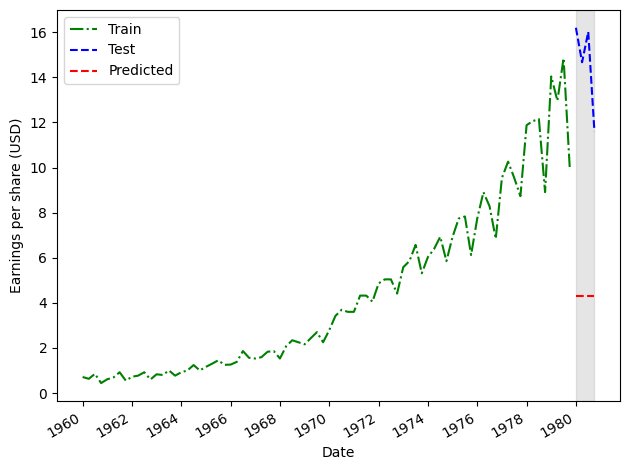

In [14]:
# PLOT and VISUALIZE
# ==================
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b--', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2) # area for shaded from index 80 to 83
ax.legend(loc=2)

# to avoid crowded x-axis. [0, 8, 16 , ... 80], followed by label
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# to automatically format ticks label, slightly rotate them, legible
fig.autofmt_xdate()
# to remove any excess white space around figure
plt.tight_layout()

Lessons Learned -> The earlier valeus does not seem to be predictive of future values in the long term, beacuse of positive trend component in our data

What if we used mean of the last year in our training data.


### 2. Forecasting last year's mean

12.96
15.5963680725103


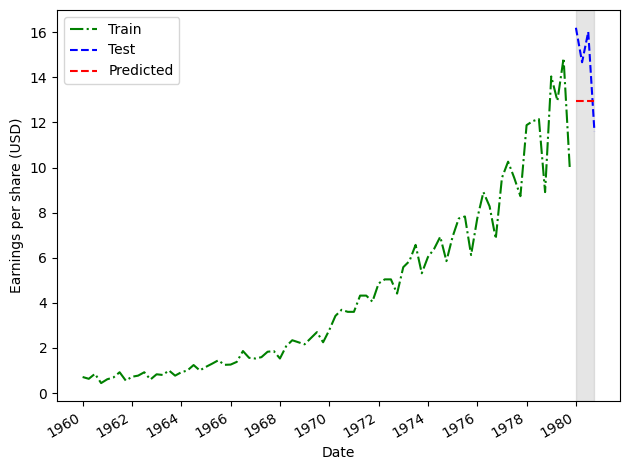

In [19]:
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

test.loc[:, 'pred_last_yr_mean'] = last_year_mean
mape_last_year_mean = mape(test['data'], test['pred_last_yr_mean'])
print(mape_last_year_mean)

fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b--', label='Test')
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

# That future values likely depend on past values that are not too far back in history
# Sign of autocorrelation

### 3. Predicting using the last know value

9.99
30.457277908606535


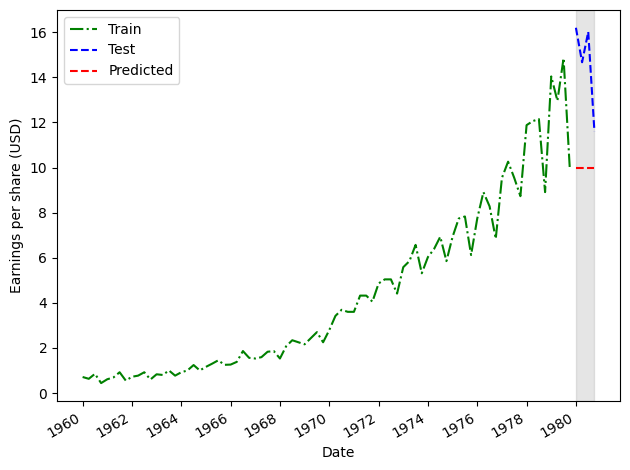

In [38]:
last = train.data.iloc[-1]
print(last)

test.loc[:, 'pred_last'] = last

mape_last = mape(test['data'], test['pred_last'])
print(mape_last)

fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b--', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

# ================
# MAPE is 30%, whereas MAPE is 15% for predictiion made using last quarter
# This can be explained by cyclical behavior, where it is high for first 3 quarters
# then drops for last quarter. Using last quarter does not take seasonality into account


### 4. Implementing the naive seasonal forecast

11.561658552433654


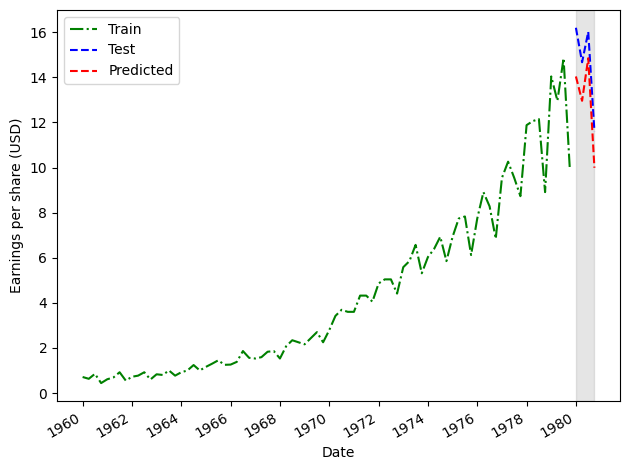

In [45]:
test.loc[:, 'pred_last_season'] = train.data.iloc[-4:].values

mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(mape_naive_seasonal)

fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b--', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

# ==================
# This has lowest MAPE of all baselines, Means seasonality has impact

### Conclusion

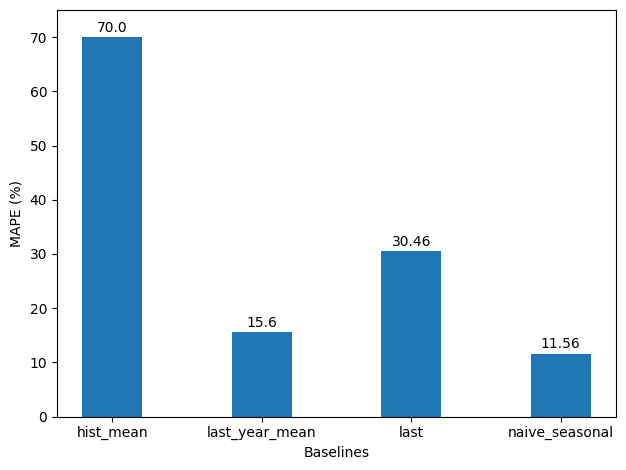

In [47]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value+1, s=str(value), ha='center')

plt.tight_layout()